In [7]:
import keras
from keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X = pd.read_csv('X.csv', index_col=0)
Y = pd.read_csv('Y.csv', index_col=0)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

# Transpose the dataset
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train =np.array(y_train)
y_test = np.array(y_test)


model = keras.Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(885, 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='linear')
])


model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


/opt/miniconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 7.6487 - mean_absolute_error: 2.0282 - val_loss: 1.1110 - val_mean_absolute_error: 0.8127
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 1.6763 - mean_absolute_error: 0.9907 - val_loss: 0.7003 - val_mean_absolute_error: 0.6248
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 1.1844 - mean_absolute_error: 0.8519 - val_loss: 0.6243 - val_mean_absolute_error: 0.5961
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 1.0550 - mean_absolute_error: 0.8098 - val_loss: 0.5568 - val_mean_absolute_error: 0.5743
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.9618 - mean_absolute_error: 0.7579 - val_loss: 0.5337 - val_mean_absolute_error: 0.5751
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.9666 - mean_absolute_error: 0.7788 - val_loss: 0.6198 - val_mean_absolute_error: 0.5889
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.9896 - mean_absolute_error: 0.7743 - v

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3832 - mean_absolute_error: 0.4389
Test Mean Absolute Error: 0.44018059968948364
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


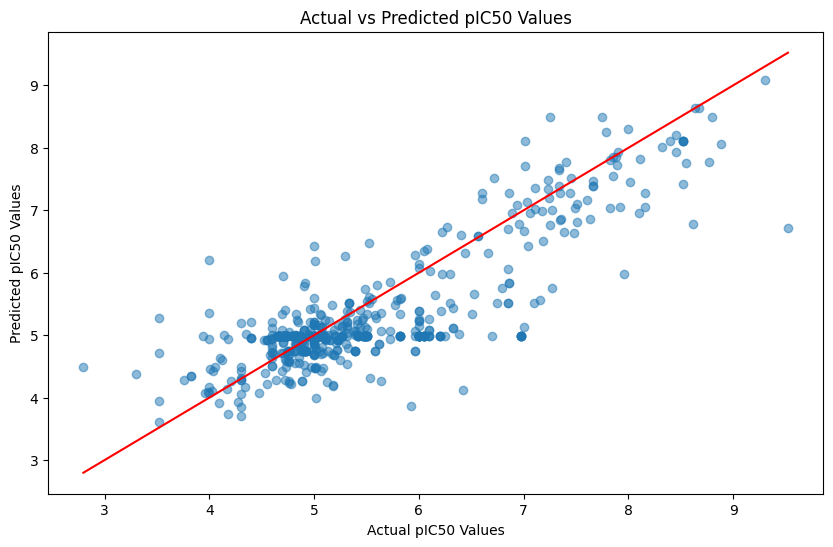

In [9]:
loss, mae = model.evaluate(x_test, y_test)
print(f'Test Mean Absolute Error: {mae}')

y_pred = model.predict(x_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual pIC50 Values')
plt.ylabel('Predicted pIC50 Values')
plt.title('Actual vs Predicted pIC50 Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line of equality
plt.show()